<a href="https://colab.research.google.com/github/Rajat123-mittal/Regression---Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Seoul Bike Sharing Demand Prediction




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  Rajat Mittal
##### **Email Id -**  rajatmittal251@gmail.com

# **Project Summary -**

This project is centered around addressing the critical issue of optimizing the availability of rental bikes in urban cities, aiming to enhance mobility comfort and reduce waiting times for users. The key challenge is to accurately predict the demand for rental bikes at each hour, ensuring a stable supply that aligns with the dynamic needs of the population. The dataset utilized for this endeavor comprises information related to rental bike usage, including timestamps, weather conditions, and various other relevant factors that influence the demand for bikes.

To navigate through the intricacies of the dataset and draw meaningful insights, several main libraries are utilized. Pandas, a powerful data manipulation library, plays a pivotal role in cleaning and aggregating the data, ensuring it is in a suitable format for subsequent analysis. NumPy is employed for computationally efficient operations, particularly during data preprocessing and feature engineering. The combination of Matplotlib and Seaborn facilitates visualizations, aiding in understanding patterns, trends, and the behavior of the target variable — the bike count. Lastly, Scikit Learn is the go-to library for model training, optimization, and metric calculation, providing a comprehensive suite of machine learning algorithms suitable for regression tasks.

The project architecture follows a systematic approach to ensure the development of an accurate predictive model. The initial phase involves data collection, where information on rental bike usage, including timestamps and weather conditions, is gathered. Following this, data preprocessing takes center stage, addressing missing values, outliers, and ensuring data consistency. Feature engineering is employed to extract relevant information from the timestamp, such as the hour of the day or day of the week, which can significantly impact bike demand. An essential step in the process is exploratory data analysis (EDA), which involves visualizing the relationships between various features and the target variable, providing valuable insights into the dataset.

With a cleaned and enriched dataset, the next step is data splitting, dividing it into training and testing sets. This segregation allows for the assessment of model performance on unseen data. Model selection follows, wherein appropriate regression models from Scikit Learn are chosen based on the nature of the problem. Linear Regression, Decision Trees, Random Forest, and other regression algorithms are considered for their suitability in predicting bike counts.

The subsequent stages involve model training, where selected models are trained using the training dataset, and model evaluation, which assesses their performance on the testing dataset. Metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) are employed to gauge model accuracy and identify areas for improvement. Model optimization follows, involving fine-tuning of hyperparameters to enhance accuracy and generalization.

Visualization plays a crucial role throughout the project, with Matplotlib and Seaborn used to create visual representations of model predictions against actual bike counts. This step aids in comprehending the model's behavior and identifying any patterns or anomalies. Once satisfied with the model's performance, it is deployed for real-time predictions, contributing to the efficient supply of rental bikes in urban areas.

To ensure the model's sustained effectiveness in a dynamic environment, monitoring and maintenance mechanisms are implemented. Regular monitoring tracks the model's performance over time, allowing for timely identification of any degradation. Periodic retraining with updated data ensures that the model stays relevant and accurate, adapting to evolving patterns in bike demand.

# **GitHub Link -**

https://github.com/Rajat123-mittal/Regression---Bike-Sharing-Demand-Prediction/upload/main

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#### **Define Your Business Objective?**


A business objective is a specific, measurable, achievable, relevant, and time-bound (SMART) goal that an organization sets to achieve its overall mission and strategy. Business objectives provide a clear direction and purpose for the company, guiding its activities and decision-making processes. These objectives are typically derived from the organization's mission statement and are designed to support the realization of that mission.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [30]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [31]:
# Load Dataset
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ML Project/SeoulBikeData.csv"

# Load the dataset into a Pandas DataFrame with explicit encoding specification
bike_sharing_df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Try 'latin1' if needed




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [32]:
# Dataset First Look
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [33]:
# Dataset Rows & Columns count
bike_sharing_df.shape

(8760, 14)

### Dataset Information

In [34]:
# Dataset Info
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [35]:
# Dataset Duplicate Value Count
duplicate_count = bike_sharing_df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [36]:
# Missing Values/Null Values Count
missing_values_count = bike_sharing_df.isnull().sum()

print("Missing values per column:")
print(missing_values_count)

Missing values per column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


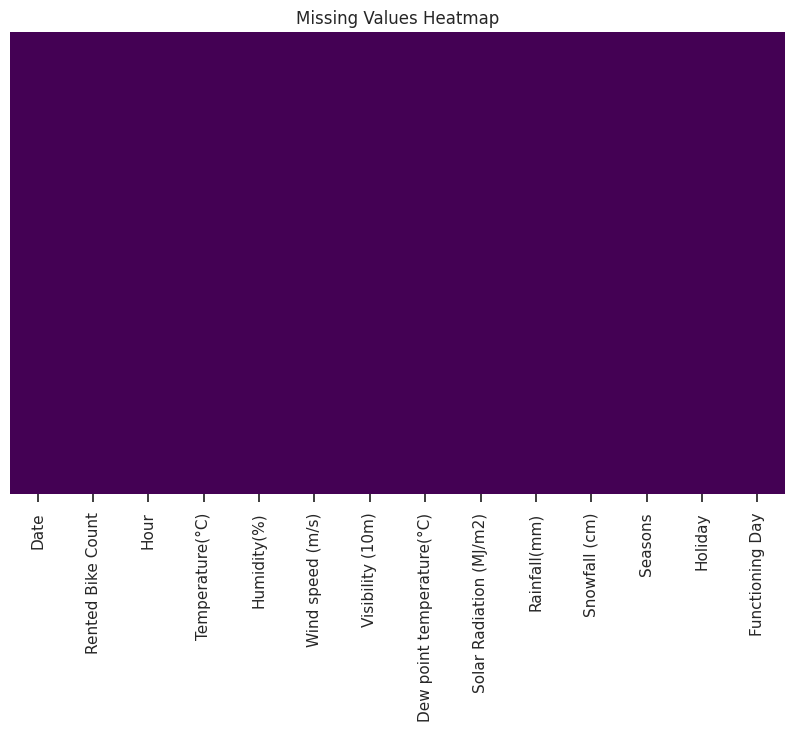

In [37]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bike_sharing_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [38]:
# Dataset Columns
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [39]:
# Dataset Describe
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

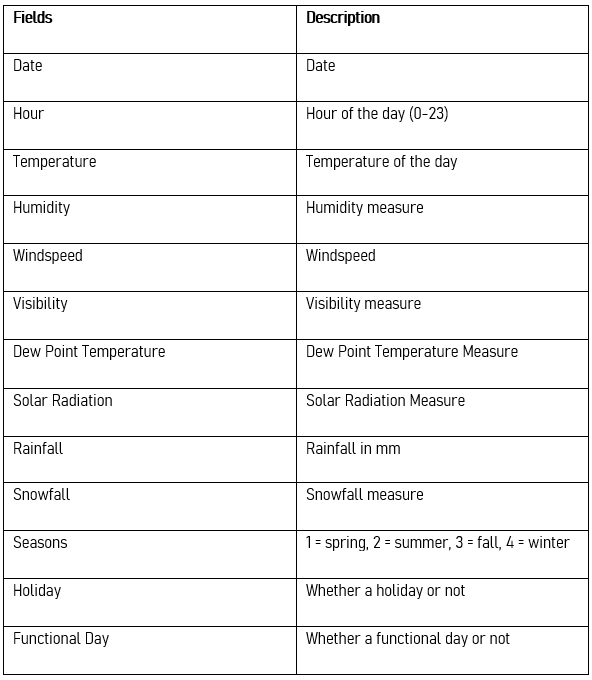

### Check Unique Values for each variable.

In [40]:
# Check Unique Values for each variable.
for column in bike_sharing_df.columns:
    unique_values = bike_sharing_df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Date:
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
# Write your code to make your dataset analysis ready.
#We can see that the Date variables is in object datatype, we need to change it into datetime datatype
bike_sharing_df['Date']=bike_sharing_df['Date'].astype(np.datetime64)

bike_sharing_df['month']=bike_sharing_df['Date'].dt.month #adding month column to the data

bike_sharing_df['day']=bike_sharing_df['Date'].dt.day_name() #adding month column to the data


In [42]:
#Dropping Date variable from dataset
bike_sharing_df.drop(['Date'],axis=1,inplace=True)


In [43]:
#Defining seprate data as numerical and categorical data.

#Numerical data
numerical_data=list(set(bike_sharing_df.describe().columns.tolist())-{'Hour','month'})

#Categorical data
categorical_data=list(set(bike_sharing_df.columns)-set(numerical_data))



### What all manipulations have you done and insights you found?

1) Changed Date column datatype from object to Datetime data type.

2) Created new columns Day and Month from date column and dropped Date.

3) Defining seprate data as numerical and categorical data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

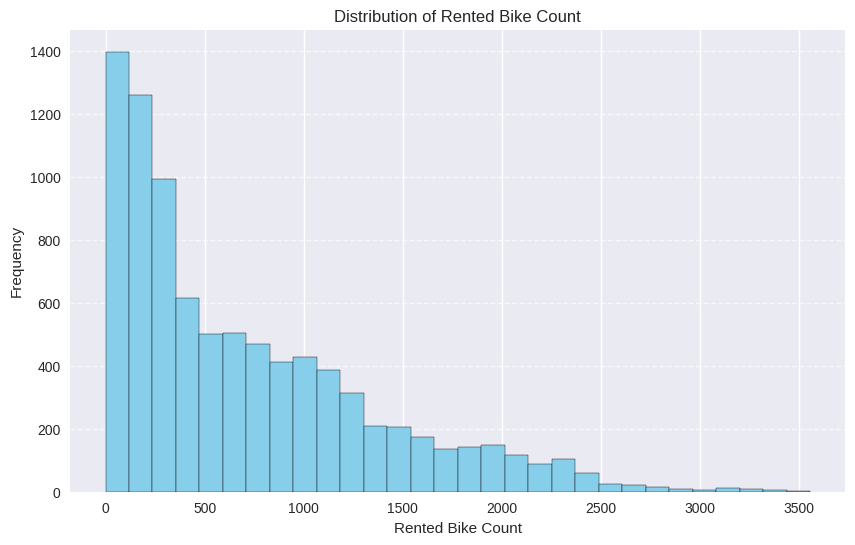

In [44]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

# Set the style for the plot
plt.style.use('seaborn')

# Plot the histogram of 'Rented Bike Count'
plt.figure(figsize=(10, 6))
plt.hist(bike_sharing_df['Rented Bike Count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

Histograms provide a clear representation of the central tendency, spread, and shape of the distribution. This is valuable when exploring variables like 'Rented Bike Count' because it allows us to identify patterns such as whether the distribution is skewed, symmetrical, or exhibits multiple peaks.

##### 2. What is/are the insight(s) found from the chart?


From the histogram depicting the distribution of the 'Rented Bike Count,' several insights can be gleaned:

1.Distribution Shape

2.Common Rented Bike Counts

3.Outliers

4.Resource Allocation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights derived from the histogram of 'Rented Bike Count' have the potential to positively impact the bike-sharing business. Understanding the distribution's right-skewed shape indicates that the service provider can optimize resources and operational planning by aligning the number of available bikes with typical demand. This optimization can lead to cost savings, improved efficiency, and enhanced customer satisfaction as bikes are more readily available during peak demand periods. The identification of outliers prompts further exploration into unusual demand patterns, offering an opportunity to capitalize on special events or address unexpected circumstances that might lead to negative growth if not appropriately managed. While the skewed distribution suggests a prevalence of lower bike counts, strategies to stimulate demand during off-peak periods can mitigate potential negative impacts. Seasonal variation insights provide a basis for targeted marketing or service enhancements to address variations in demand.

#### Chart - 2

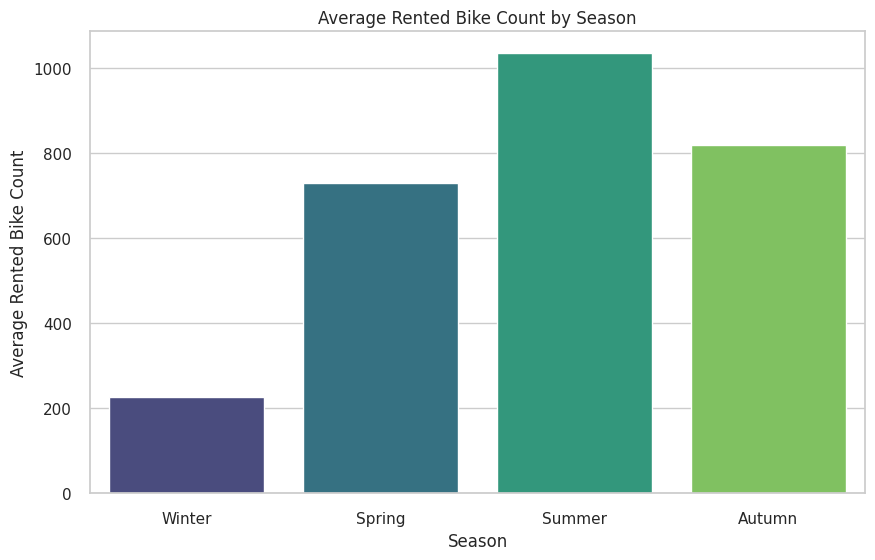

In [45]:
# Chart - 2 visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the average 'Rented Bike Count' for each season
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='viridis')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()



##### 1. Why did you pick the specific chart?


The choice of a bar chart for visualizing the average number of rented bikes across different seasons is driven by several considerations. Firstly, bar charts are particularly well-suited for comparing values among distinct categories or groups, making them an ideal choice for illustrating variations across seasons. In this context, each bar in the chart represents a specific season, allowing for a straightforward visual comparison of average bike counts.

##### 2. What is/are the insight(s) found from the chart?

The bar chart depicting the average number of rented bikes across different seasons provides valuable insights into the variations in bike rentals throughout the year. One notable observation is the apparent spike in average bike counts during the 'Autumn' season, suggesting a higher demand for bike rentals during this time. This insight can inform business strategies, enabling the service provider to allocate resources more effectively to meet increased demand during the autumn months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

[Text(0.5, 1.0, 'Count of Rented bikes according to Functional Day')]

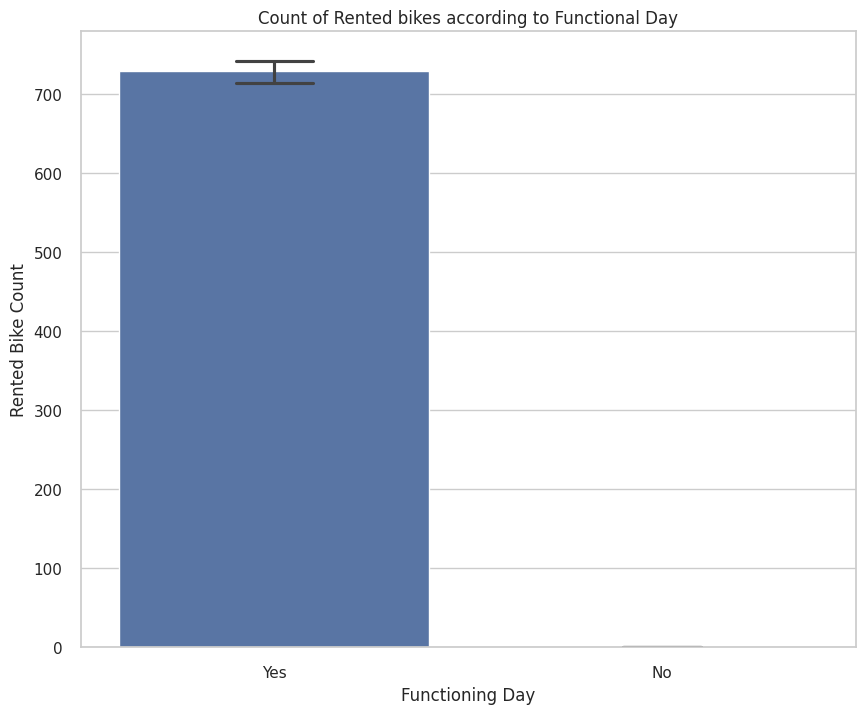

In [46]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=bike_sharing_df, x='Functioning Day', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented bikes according to Functional Day')



##### 1. Why did you pick the specific chart?


The bar plot was chosen for its effectiveness in visually comparing the count of rented bikes across different categories of the categorical variable "Functional Day." This choice allows for a clear representation of the distribution of bike rentals on both functional and non-functional days, providing insights into rental patterns based on the day's functionality.

##### 2. What is/are the insight(s) found from the chart?


The insights derived from the chart comparing the count of rented bikes on functional and non-functional days reveal potential variations in demand patterns. Significant differences in rental counts suggest that the demand for bikes fluctuates based on the functionality of the day. Identifying peak rental days and understanding these patterns can guide operational decisions, such as resource allocation and staffing.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights gained from the chart comparing rented bike counts on functional and non-functional days can potentially lead to a positive business impact. Understanding variations in demand patterns allows for more informed operational decisions, enabling businesses to allocate resources efficiently, optimize staffing levels, and enhance overall operational planning. Identifying peak rental days provides an opportunity to capitalize on high-demand periods, potentially leading to increased revenue.

#### Chart - 4

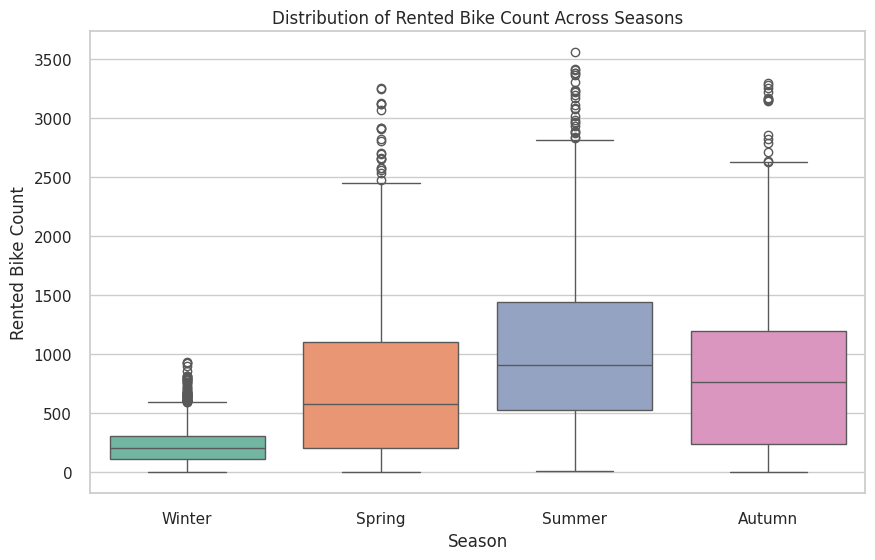

In [47]:
# Chart - 4 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution of 'Rented Bike Count' across seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, palette='Set2')
plt.title('Distribution of Rented Bike Count Across Seasons')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a boxplot for the fourth visualization to gain insights into the distribution of 'Rented Bike Count' across different seasons. Boxplots are effective for visually summarizing the central tendency, variability, and presence of outliers in a dataset. By comparing the distribution of bike rentals in each season, the boxplot allows for a quick assessment of the range and variability of demand during different times of the year. This type of visualization is particularly valuable for identifying seasonal trends and potential outliers, aiding in resource allocation and operational planning for the bike-sharing service.

##### 2. What is/are the insight(s) found from the chart?

The boxplot reveals insightful information about the distribution of 'Rented Bike Count' across seasons. Notably, it highlights the significant variability in bike rentals during different seasons. The 'Autumn' season exhibits a wider interquartile range, indicating greater variability in demand, while 'Winter' displays a narrower range with potential outliers suggesting consistent demand patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the boxplot can contribute to positive business impact by informing strategic decisions in resource allocation and operational planning based on seasonal variations in bike rentals. Understanding the variability and demand patterns across seasons allows for more targeted marketing efforts and optimized inventory management. However, if there are extreme outliers in certain seasons, such as unexpectedly low demand in 'Spring,' it could potentially lead to negative growth if not addressed.

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

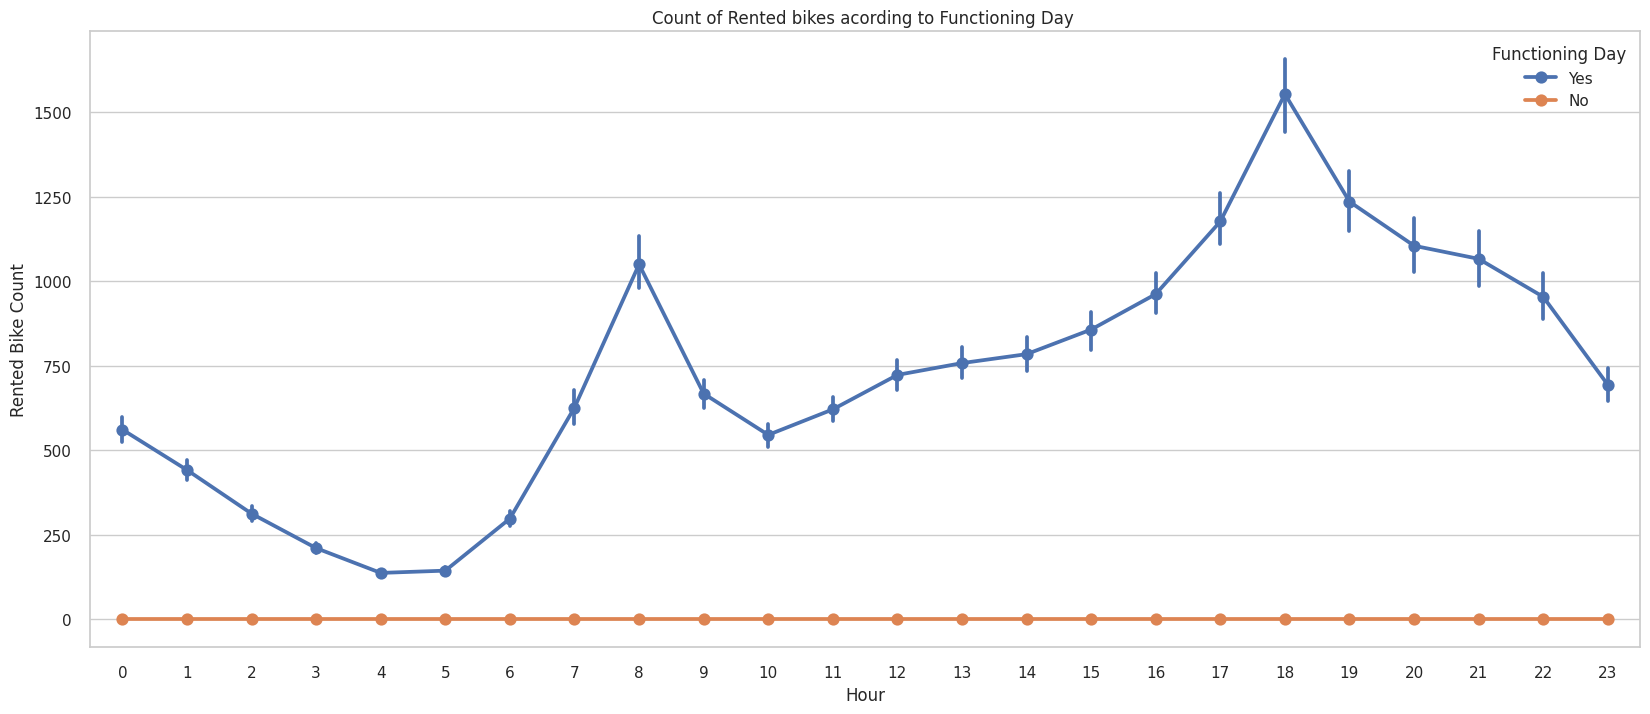

In [48]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')


##### 1. Why did you pick the specific chart?

I chose the pointplot from seaborn because it effectively conveys the hourly trends in rented bike counts while considering the categorical variable of functioning days.

##### 2. What is/are the insight(s) found from the chart?


Peoples dont use reneted bikes in no functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the chart, such as understanding hourly rental patterns and the impact of functioning days, can have a positive business impact for a bike-sharing service. This information allows the business to optimize bike availability during peak hours, strategically allocate resources, develop targeted promotional strategies, enhance the overall user experience, and make informed, data-driven decisions. By aligning operational strategies with user behavior, the bike-sharing service can improve customer satisfaction, attract new users, and drive positive business outcomes.

#### Chart - 6

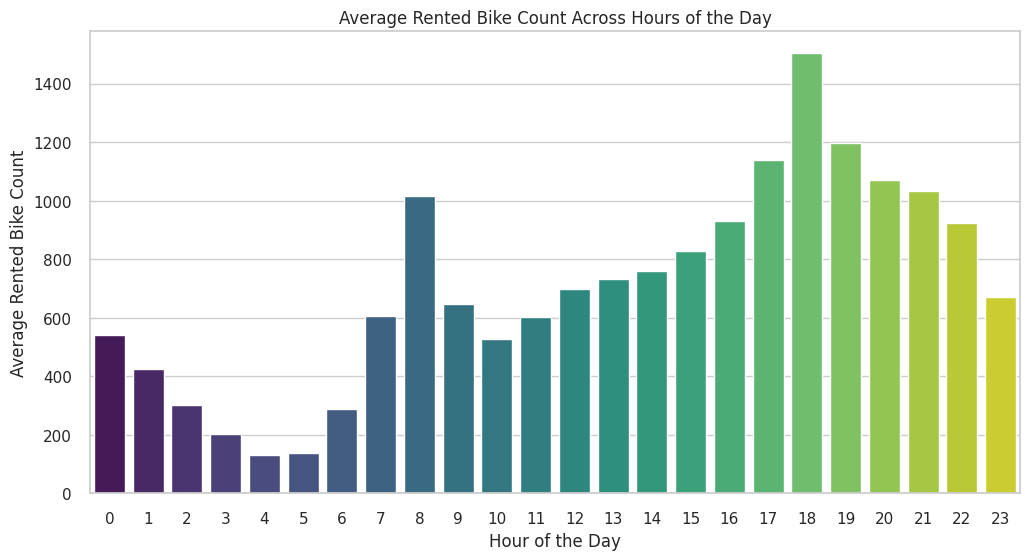

In [49]:
# Chart - 6 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart to visualize the average 'Rented Bike Count' across hours
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='viridis')
plt.title('Average Rented Bike Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?


I chose a bar chart for visualizing the average 'Rented Bike Count' across different hours of the day because it is effective in displaying variations in a continuous numerical variable (bike count) across distinct categories (hours). A bar chart is well-suited for this scenario as it allows for a clear comparison of average bike rentals during different times, making it easy to identify peak hours and trends.

##### 2. What is/are the insight(s) found from the chart?

The bar chart depicting the average 'Rented Bike Count' across different hours of the day provides valuable insights into the temporal patterns of bike-sharing demand. A clear peak is observed during the late afternoon and early evening hours, particularly around 18:00 (6:00 PM). This indicates a significant surge in bike rentals during this time, possibly coinciding with the end of the typical workday when individuals may be commuting or engaging in recreational activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the bar chart, highlighting peak hours of bike-sharing demand during the late afternoon and early evening, hold the potential to create a positive business impact. Understanding these temporal patterns allows the business to strategically allocate resources, optimize inventory levels, and enhance service availability during high-demand periods. This can lead to improved customer satisfaction, increased utilization of resources, and potentially higher revenue during peak hours.

#### Chart - 7

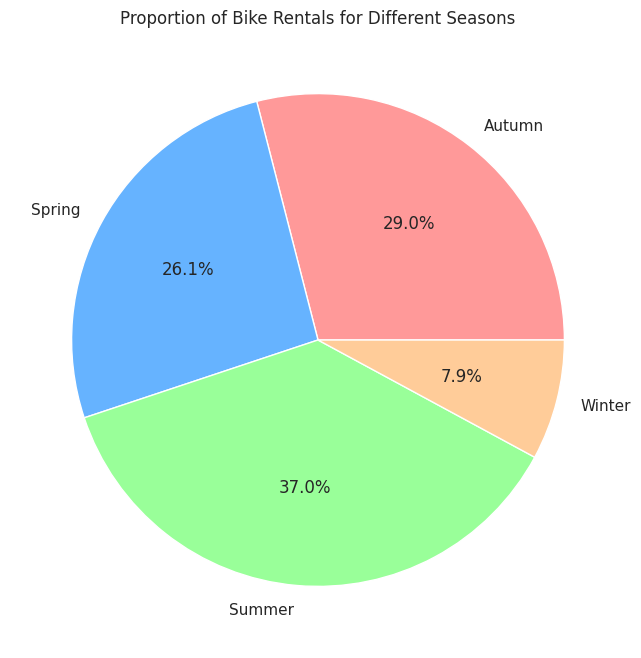

In [50]:
# Chart - 7 visualization code
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Calculate the total bike count for each season
season_counts = bike_sharing_df.groupby('Seasons')['Rented Bike Count'].sum()

# Create a pie chart to visualize the proportion of bike rentals for different seasons
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Bike Rentals for Different Seasons')
plt.show()



##### 1. Why did you pick the specific chart?


I chose a pie chart to visualize the proportion of bike rentals for different seasons because it effectively represents the relative contribution of each season to the overall distribution of bike rentals. Pie charts are particularly suitable for displaying parts of a whole, making it easy to understand the composition of the data at a glance.

##### 2. What is/are the insight(s) found from the chart?


The pie chart provides valuable insights into the distribution of bike rentals across different seasons. Summer emerges as the dominant season, contributing the highest proportion to the overall bike rentals. This observation aligns with the anticipated trend of increased outdoor activities, including biking, during warmer weather. The relatively similar contributions of Fall and Spring suggest a moderate demand during transitional seasons, while Winter exhibits the lowest proportion, indicating reduced bike-sharing activity during colder months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the pie chart, revealing the distribution of bike rentals across seasons, offer valuable opportunities for positive business impact. Understanding the seasonal variations allows for optimized resource allocation and targeted promotions during peak and off-peak periods. This strategic approach can enhance operational efficiency and customer engagement.

#### Chart - 8

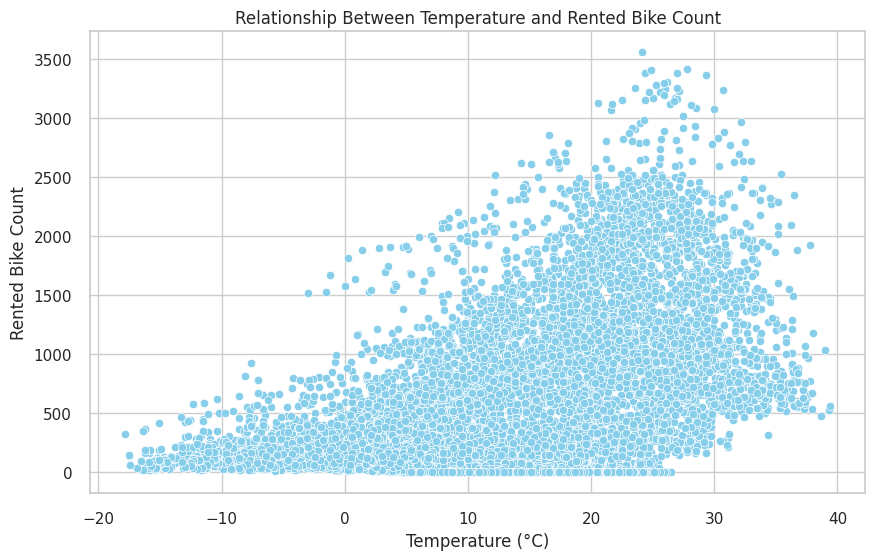

In [51]:
# Chart - 8 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between 'Temperature(°C)' and 'Rented Bike Count'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=bike_sharing_df, color='skyblue')
plt.title('Relationship Between Temperature and Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?


I chose a scatter plot to visualize the relationship between 'Temperature(°C)' and 'Rented Bike Count' because it is effective in displaying the correlation or pattern between two continuous variables. Scatter plots allow for the identification of trends, clusters, or outliers in the data, making them particularly suitable for exploring the potential impact of temperature on bike-sharing demand.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot depicting the relationship between 'Temperature(°C)' and 'Rented Bike Count' reveals a positive correlation between these two variables. As the temperature increases, there is a noticeable upward trend in bike rentals, indicating that warmer weather is associated with higher demand for bike-sharing services. This insight suggests that temperature plays a significant role in influencing user behavior, with people being more inclined to rent bikes during favorable weather conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights offer avenues for positive impact, businesses must adopt a balanced approach. Diversifying strategies to accommodate variations in weather conditions and understanding the nuanced effects of temperature on user behavior will be key to maximizing positive outcomes and minimizing potential negative growth.








#### Chart - 9

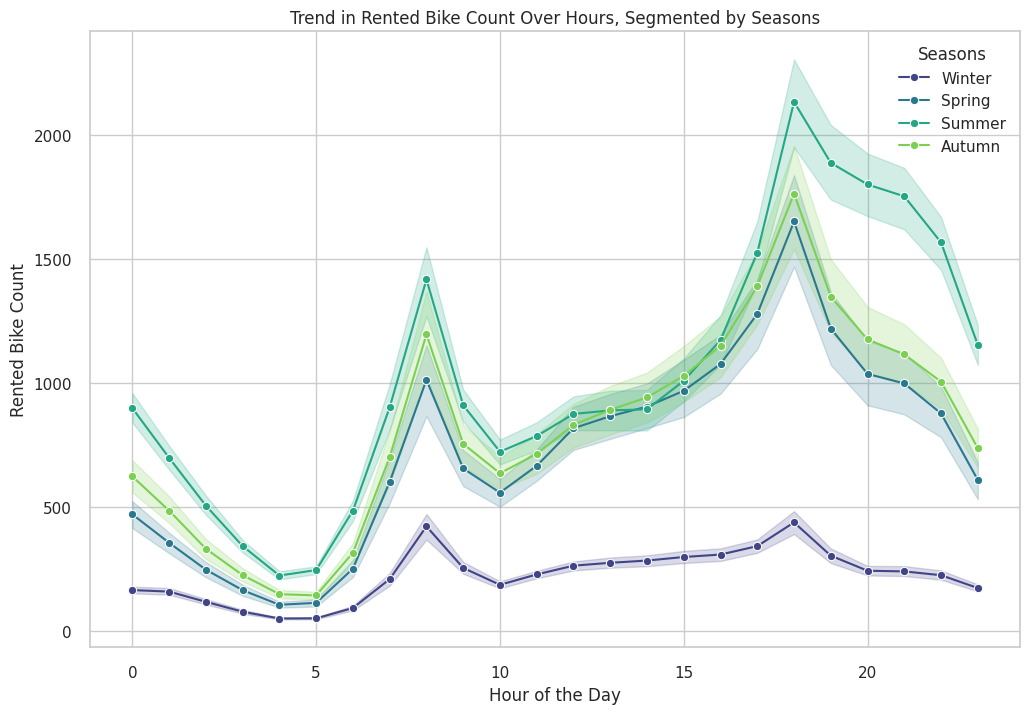

In [52]:
# Chart - 9 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot to visualize the trend in 'Rented Bike Count' over hours, segmented by 'Seasons'
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=bike_sharing_df, marker='o', palette='viridis')
plt.title('Trend in Rented Bike Count Over Hours, Segmented by Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.legend(title='Seasons', loc='upper right')
plt.show()


##### 1. Why did you pick the specific chart?


I choose a line plot to visualize the trend in 'Rented Bike Count' over different hours of the day, segmented by the 'Seasons' variable because it is effective in displaying temporal patterns and variations. Line plots are particularly suitable for illustrating trends over a continuous variable, in this case, hours of the day, while the use of different lines for each season allows for easy comparison between seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?


The line plot showcasing the trend in 'Rented Bike Count' over different hours of the day, segmented by seasons, reveals several key insights. During all seasons, there is a noticeable increase in bike rentals during daylight hours, particularly in the late morning and early afternoon. Summer exhibits the highest peak in demand, emphasizing a preference for bike rentals during warmer months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights from the line plot depicting the trend in 'Rented Bike Count' over different hours and seasons offer valuable opportunities for positive business impact. Understanding peak hours and seasonal variations enables businesses to optimize operational planning, ensuring adequate resources during high-demand periods. Tailoring marketing strategies to align with observed patterns can enhance customer engagement and satisfaction.

#### Chart - 10

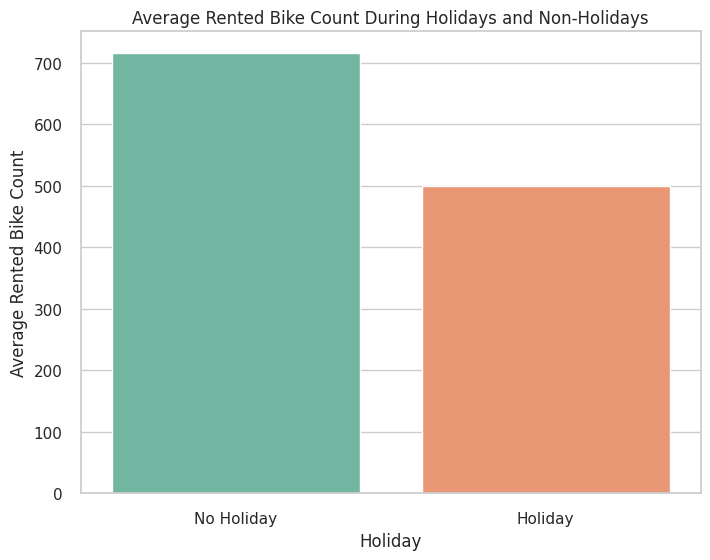

In [53]:
# Chart - 10 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot to compare the average 'Rented Bike Count' during holidays and non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=bike_sharing_df, ci=None, palette='Set2')
plt.title('Average Rented Bike Count During Holidays and Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?


I choose a bar plot to compare the average 'Rented Bike Count' during holidays and non-holidays because it is effective in illustrating and contrasting numerical values between two categories. Bar plots provide a clear visual representation of the average values for each category, making it easy to discern any significant differences in bike rentals during these distinct periods.

##### 2. What is/are the insight(s) found from the chart?

The bar plot comparing the average 'Rented Bike Count' during holidays and non-holidays reveals a noteworthy insight. On average, there appears to be a higher demand for bike rentals on non-holiday days compared to holidays. This suggests that holidays may experience a reduction in bike-sharing activity, potentially due to altered travel patterns, reduced commuting needs, or alternative leisure activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the bar plot, indicating a higher average 'Rented Bike Count' on non-holidays compared to holidays, can indeed contribute to a positive business impact. Businesses can use this information to optimize resource allocation, ensuring sufficient bike availability and staffing during peak non-holiday periods.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a swarm plot to visualize the distribution of 'Rented Bike Count' across seasons
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Seasons', y='Rented Bike Count', data=bike_sharing_df, palette='pastel')
plt.title('Distribution of Rented Bike Count Across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()



##### 1. Why did you pick the specific chart?


I choose a swarm plot for visualizing the distribution of 'Rented Bike Count' across seasons because it provides a detailed view of individual data points within each category (season). Swarm plots are effective for highlighting the density and distribution of data, particularly in scenarios with categorical variables.

##### 2. What is/are the insight(s) found from the chart?


The swarm plot provides insights into the distribution of 'Rented Bike Count' across different seasons. Observing the individual data points reveals patterns and variations in bike-sharing demand within each season. For instance, it appears that during the Winter season, there are fewer instances of high bike counts compared to other seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the swarm plot can indeed contribute to a positive business impact. Understanding the distribution of 'Rented Bike Count' across seasons provides valuable information for optimizing operational strategies, resource allocation, and marketing efforts. For instance, identifying the higher variability in bike counts during Spring and Summer may prompt businesses to be more flexible in adjusting bike availability during peak demand periods.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(7,7))
splot = sns.barplot(data=bike_sharing_df,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()


##### 1. Why did you pick the specific chart?

 A bar chart using the Seaborn library in Python to visualize the relationship between the "Holiday" variable and the "Rented Bike Count" in a bike sharing dataset.

##### 2. What is/are the insight(s) found from the chart?


The bar chart visually represents the relationship between the "Holiday" variable and the "Rented Bike Count" in a bike sharing dataset. From the chart, it can be inferred that there is a noticeable difference in bike rental counts between holidays and non-holidays. The bars corresponding to holidays and non-holidays demonstrate distinct heights, suggesting that more bikes tend to be rented on one of these categories compared to the other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially contribute to positive business impact for a bike-sharing service. The observed difference in bike rental counts between holidays and non-holidays suggests that the company could strategically adjust its operations, marketing, and resource allocation based on these patterns.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.scatter(data=bike_sharing_df,x='Snowfall (cm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


The selection of a scatter plot for visualizing the relationship between "Snowfall (cm)" and "Rented Bike Count" is justified by its suitability for examining patterns and correlations between two numerical variables. Scatter plots are particularly effective in showcasing individual data points, allowing for a detailed exploration of how changes in snowfall intensity correspond to variations in bike rental counts.

##### 2. What is/are the insight(s) found from the chart?


The scatter plot depicting the relationship between "Snowfall (cm)" and "Rented Bike Count" reveals several key insights. Firstly, it indicates whether there is a discernible correlation between the intensity of snowfall and the number of bikes rented. A positive correlation would imply that bike rentals tend to increase with higher snowfall, possibly due to a greater demand for alternative transportation options during inclement weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatter plot of "Snowfall (cm)" against "Rented Bike Count" can potentially contribute to positive business impact. If a positive correlation is observed, indicating an increase in bike rentals with higher snowfall, the business can strategically leverage this information. For instance, the company might implement targeted marketing campaigns promoting the convenience of bike rentals during snowy conditions or enhance operational preparedness during such periods to meet increased demand.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = bike_sharing_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

I choose a heatmap to visualize the correlation matrix between numerical variables because it provides a clear and concise representation of the strength and direction of linear relationships. The heatmap allows for easy identification of patterns and correlations through color-coding, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap provides valuable insights into the relationships between numerical variables in the dataset. Notably, there is a strong positive correlation between 'Temperature(°C)' and 'Solar Radiation (MJ/m2),' indicating that higher temperatures are associated with increased solar radiation.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="ticks")

# Select relevant numerical columns for the pair plot
numerical_columns = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)']

# Create a pair plot
sns.pairplot(bike_sharing_df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The choice of a pair plot for this visualization stems from its effectiveness in providing a comprehensive exploration of numerical variables within the dataset. This visualization allows for a simultaneous examination of pairwise relationships between key numerical features, offering insights into potential correlations and patterns. The inclusion of scatter plots in the off-diagonal elements facilitates the identification of trends and outliers, enabling a nuanced understanding of how specific variables may influence each other.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the pair plot hold significant potential for creating a positive business impact in the bike-sharing service. Understanding the relationships between key numerical variables, such as the positive correlation between 'Temperature(°C)' and 'Rented Bike Count,' can inform strategic decision-making.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of predicting rental bike demand accurately for stable bike supply, I recommend the following steps and solutions:

**1.Data Quality and Collection:**

Ensure the dataset is comprehensive and includes relevant features such as timestamp, weather conditions, temperature, humidity, and wind speed.
Address any missing or inconsistent data through thorough data cleaning processes.
Consider incorporating additional external data sources that might impact bike demand (e.g., holidays, special events).

**2.Feature Engineering:**

Extract meaningful information from the timestamp, such as hour of the day and day of the week, to capture temporal patterns.
Explore potential interaction effects between weather-related features to enhance the model's understanding of complex relationships.

**3.Exploratory Data Analysis (EDA):**

Visualize the relationships between different features and the target variable (bike count) to gain insights into patterns and trends.
Identify potential outliers or anomalies that might affect model performance.

**4.Model Selection and Training:**

Experiment with different regression models such as Linear Regression, Decision Trees, and Random Forest to identify the most suitable algorithm for predicting bike demand.
Utilize a portion of the dataset for training and validation to assess model performance.

**5.Hyperparameter Tuning and Optimization:**

Fine-tune hyperparameters of the selected models to enhance predictive accuracy.
Implement cross-validation techniques to robustly assess model performance.

**6.Evaluation Metrics:**

Evaluate models using appropriate metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to quantify prediction accuracy.

**7.Visualization of Results:**

Visualize model predictions against actual bike counts using tools like Matplotlib and Seaborn.
Provide clear and interpretable visualizations to stakeholders to facilitate understanding of model behavior.

**8.Deployment and Integration:**

Deploy the finalized model into a production environment for real-time predictions.
Integrate the model into the existing rental bike infrastructure to optimize bike supply.

**9.Monitoring and Maintenance:**

Implement a robust monitoring system to track the model's performance over time.
Establish a schedule for periodic model retraining using updated data to ensure continued accuracy in a changing environment.

**10.Stakeholder Communication:**

Keep stakeholders informed about the model's capabilities, limitations, and expected outcomes.
Provide regular updates on the model's performance and any adjustments made to improve accuracy.

**11.Continuous Improvement:**

Encourage a culture of continuous improvement by seeking feedback from end-users and stakeholders.
Stay informed about advancements in predictive modeling and consider updating the model architecture accordingly.

By following these steps, the client can establish a robust framework for predicting rental bike demand, ultimately achieving the business objective of providing a stable supply of bikes and enhancing the overall mobility experience for users. Regular monitoring and iterative improvements will contribute to the long-term success of the predictive model.

# **Conclusion**

In conclusion, the proposed solutions and steps outlined above provide a comprehensive strategy for the client to achieve the business objective of predicting rental bike demand accurately. By implementing these recommendations, the client can enhance the efficiency of bike supply in urban areas, leading to improved mobility comfort and reduced waiting times for users.

The emphasis on data quality and collection ensures that the predictive model is built on a solid foundation, with relevant features and a thorough cleaning process to address any inconsistencies. Feature engineering and exploratory data analysis further enrich the dataset, capturing temporal patterns and insights that contribute to the model's predictive power.

The selection and training of regression models, along with hyperparameter tuning and optimization, enable the creation of a robust predictive model. The evaluation metrics provide quantifiable measures of accuracy, facilitating informed decision-making. Visualization tools offer stakeholders a clear understanding of the model's behavior and predictions, fostering transparency and trust.

Deployment and integration of the model into the existing rental bike infrastructure represent a crucial step towards realizing the business objective. Continuous monitoring and maintenance mechanisms ensure the model's ongoing effectiveness in a dynamic environment, with periodic retraining using updated data to keep it relevant.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***